## Set up dataset

In [1]:
conda install pytorch torchvision==0.4.0 cuda100 -c pytorch

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - torchvision==0.4.0

Current channels:

  - https://conda.anaconda.org/pytorch/win-64
  - https://conda.anaconda.org/pytorch/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
from torch.hub import load_state_dict_from_url

In [3]:
pip install robustness

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install pillow

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\32456\anaconda3\envs\r

  added / updated specs:
    - pillow


The following packages will be UPDATED:

  pillow                               6.1.0-py37hdc69c19_0 --> 9.2.0-py37hdc2b20a_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [5]:
conda install pillow=6.1

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\32456\anaconda3\envs\r

  added / updated specs:
    - pillow=6.1


The following packages will be DOWNGRADED:

  pillow                               9.2.0-py37hdc2b20a_1 --> 6.1.0-py37hdc69c19_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
ATTACK_EPS = 0.5
ATTACK_STEPSIZE = 0.1
ATTACK_STEPS = 10
NUM_WORKERS = 8
BATCH_SIZE = 10

In [8]:
import torch as ch
from robustness.datasets import CIFAR
ds = CIFAR('/tmp')

In [9]:
import tensorflow as tf

## Instantiate model

In [10]:
from robustness.model_utils import make_and_restore_model
model, _ = make_and_restore_model(arch='resnet50', dataset=ds,
             resume_path='C:/Users/32456/robust/newest/Cifar AT model/cifar_l2_0_5(Done).pt')
model.eval()
pass

=> loading checkpoint 'C:/Users/32456/robust/newest/Cifar AT model/cifar_l2_0_5(Done).pt'
=> loaded checkpoint 'C:/Users/32456/robust/newest/Cifar AT model/cifar_l2_0_5(Done).pt' (epoch 153)


## Set up loaders

In [5]:
train_loader2, test_loader2 = ds.make_loaders(workers=0, batch_size=10)
_, (im2, label2) = next(enumerate(train_loader2))

==> Preparing dataset cifar..
Files already downloaded and verified
Files already downloaded and verified


In [6]:
im2.shape

torch.Size([10, 3, 32, 32])

In [7]:
_, test_loader1 = ds.make_loaders(workers=0, batch_size=10)

_, (im, label) = next(enumerate(test_loader1))

==> Preparing dataset cifar..
Files already downloaded and verified
Files already downloaded and verified


## Generating untargeted adversarial examples

In [10]:
kwargs = {
    'constraint':'2', # use L2-PGD
    'eps': ATTACK_EPS, # L2 radius around original image
    'step_size': ATTACK_STEPSIZE,
    'iterations': ATTACK_STEPS,
    'do_tqdm': True,
}

In [11]:
import torch as ch
from robustness.datasets import CIFAR
from robustness.model_utils import make_and_restore_model

In [12]:
attack_kwargs = {
   'constraint': 'inf', # L-inf PGD
   'eps': 0.05, # Epsilon constraint (L-inf norm)
   'step_size': 0.01, # Learning rate for PGD
   'iterations': 100, # Number of PGD steps
   'targeted': True # Targeted attack
}

In [13]:
_, test_loader1 = ds.make_loaders(workers=0, batch_size=10)

==> Preparing dataset cifar..
Files already downloaded and verified
Files already downloaded and verified


In [14]:
im1, label1 = next(iter(test_loader1))

In [15]:
im1.shape

torch.Size([10, 3, 32, 32])

In [16]:
target_label1 = (label1 + ch.randint_like(label1, high=9)) % 10

In [11]:
device = ch.device("cuda" if ch.cuda.is_available() else "cpu")

In [18]:
adv_out1, adv_im1 = model(im1.to(device), target_label1.to(device), make_adv=True, **attack_kwargs)

In [19]:
_, im1_adv = model(im1.to(device), label1.to(device), make_adv=True, **kwargs)

Current loss: 0.7924178838729858: 100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


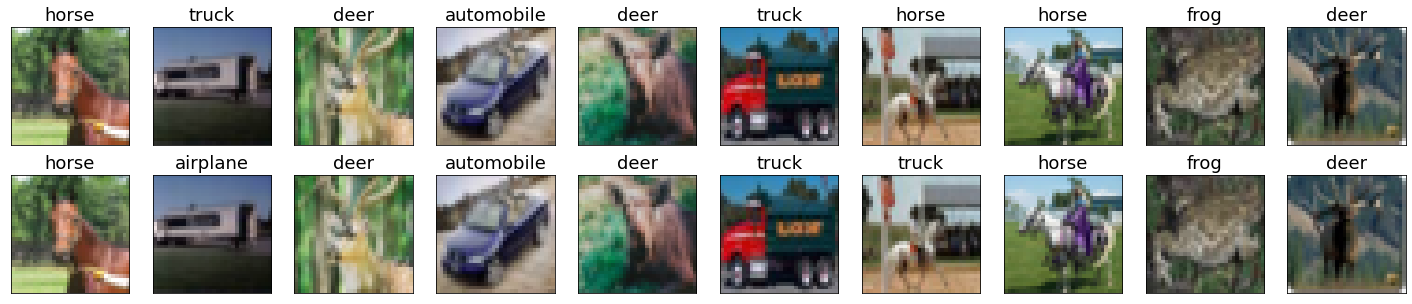

In [20]:
from robustness.tools.vis_tools import show_image_row
from robustness.tools.label_maps import CLASS_DICT

# Get predicted labels for adversarial examples
pred, _ = model(im1_adv)
label_pred = ch.argmax(pred, dim=1)

# Visualize test set images, along with corresponding adversarial examples
show_image_row([im1.cpu(), im1_adv.cpu()],
         tlist=[[CLASS_DICT['CIFAR'][int(t)] for t in l] for l in [label1, label_pred]],
         fontsize=18,
         filename='./adversarial_example_CIFAR.png')

## Targeted adversarial examples

In [21]:
kwargs = {
    'constraint':'2',
    'eps': ATTACK_EPS,
    'step_size': ATTACK_STEPSIZE,
    'iterations': ATTACK_STEPS,
    'targeted': True,
    'do_tqdm': True
}

In [22]:
targ = ch.zeros_like(label1)

In [23]:
_, im1_adv = model(im1.to(device), targ.to(device), make_adv=True, **kwargs)

Current loss: 4.231689929962158: 100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


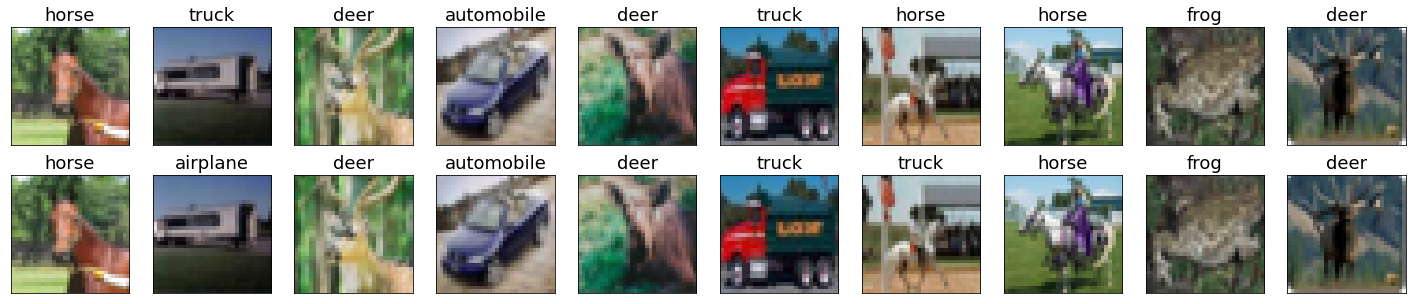

In [24]:
# Visualize test set images, along with corresponding adversarial examples
show_image_row([im1.cpu(), im1_adv.cpu()],
         tlist=[[CLASS_DICT['CIFAR'][int(t)] for t in l] for l in [label1, label_pred]],
         fontsize=18,
         filename='./adversarial_example_CIFAR.png')

## Custom Input Manipulation (Representation Inversion)

In [12]:
def inversion_loss(model, inp, targ):
    # Compute representation for the input
    _, rep = model(inp, with_latent=True, fake_relu=True)
    # Normalized L2 error w.r.t. the target representation
    loss = ch.div(ch.norm(rep - targ, dim=1), ch.norm(targ, dim=1))
    return loss, None

In [13]:
kwargs = {
    'custom_loss': inversion_loss,
    'constraint':'2',
    'eps': 1000,
    'step_size': 1,
    'iterations': 1000,
    'targeted': True,
    'do_tqdm': True,
}

In [14]:
train_loader1, test_loader1 = ds.make_loaders(workers=0, batch_size=50000)

==> Preparing dataset cifar..
Files already downloaded and verified
Files already downloaded and verified


In [15]:
_, (im_inv, label_inv) = next(enumerate(train_loader1)) # Images to invert

In [16]:
import torch
import torchvision

In [17]:
i=10

In [18]:
im_seed = ch.clamp(ch.randn_like(im_inv) / 20 + 0.5, 0, 1)

In [26]:
with ch.no_grad():
    (_, rep_inv0), _ = model(im_inv[0:10].to(device), with_latent=True)  # Corresponding representation

In [27]:
rep_inv0.shape

torch.Size([10, 2048])

In [16]:
with ch.no_grad():
    (_, rep_inv0), _ = model(im_inv[0:10].to(device), with_latent=True)  # Corresponding representation
_, im_matched0 = model(im_seed[0:10].to(device), rep_inv0.to(device), make_adv=True, **kwargs)
for t in range(4999):
    with ch.no_grad():
        (_, rep_inv), _ = model(im_inv[i:i+10].to(device), with_latent=True)  # Corresponding representation
    _, im_matched = model(im_seed[i:i+10].to(device), rep_inv.to(device), make_adv=True, **kwargs)
    im_matched0 = torch.cat((im_matched, im_matched0), 0)   
    i=i+10

Current loss: 0.1057443618774414: 100%|██████████| 1000/1000 [01:29<00:00, 11.22it/s]


Current loss: 0.10629600286483765: 100%|██████████| 1000/1000 [01:29<00:00, 11.19it/s]


Current loss: 0.07803093641996384: 100%|██████████| 1000/1000 [02:11<00:00,  7.60it/s]


Current loss: 0.10593223571777344: 100%|██████████| 1000/1000 [01:29<00:00, 11.18it/s]


Current loss: 0.10199970006942749: 100%|██████████| 1000/1000 [01:29<00:00, 11.16it/s]


Current loss: 0.09122147411108017: 100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


Current loss: 0.11000054329633713: 100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


Current loss: 0.07325994968414307: 100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


Current loss: 0.08940514177083969: 100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


Current loss: 0.10055573284626007: 100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


Current loss: 0.0999356061220169: 100%|██████████| 1000/1000 [01:29<00:00, 11.13it/s]


Current loss: 0.0962662622332573: 100%|██████████| 1000/1000 [01:30<00:00, 11.11it/s]


Current loss: 0.0991424173116684: 100%|██████████| 1000/1000 [01:29<00:00, 11.13it/s]


Current loss: 0.09167089313268661: 100%|██████████| 1000/1000 [01:29<00:00, 11.13it/s]


Current loss: 0.09168540686368942: 100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


Current loss: 0.10722696781158447: 100%|██████████| 1000/1000 [01:30<00:00, 11.09it/s]


Current loss: 0.11082656681537628: 100%|██████████| 1000/1000 [01:30<00:00, 11.09it/s]


Current loss: 0.09500876069068909: 100%|██████████| 1000/1000 [01:30<00:00, 11.09it/s]


Current loss: 0.08111386746168137: 100%|██████████| 1000/1000 [01:30<00:00, 11.10it/s]


Current loss: 0.10567837208509445: 100%|██████████| 1000/1000 [01:30<00:00, 11.11it/s]


Current loss: 0.11296739429235458: 100%|██████████| 1000/1000 [01:30<00:00, 11.08it/s]


Current loss: 0.0942557081580162: 100%|██████████| 1000/1000 [01:30<00:00, 11.08it/s]


Current loss: 0.09640828520059586: 100%|██████████| 1000/1000 [01:29<00:00, 11.12it/s]


Current loss: 0.09931565076112747: 100%|██████████| 1000/1000 [01:42<00:00,  9.76it/s]


Current loss: 0.09371892362833023: 100%|██████████| 1000/1000 [01:40<00:00,  9.98it/s]


Current loss: 0.1022213026881218: 100%|██████████| 1000/1000 [01:35<00:00, 10.46it/s]


Current loss: 0.09846687316894531: 100%|██████████| 1000/1000 [01:30<00:00, 11.08it/s]


In [4]:
import numpy

In [5]:
import numpy as np

In [19]:
df = numpy.save("rob", im_matched0.cpu().numpy())
loaded_array = np.load('rob.npy')
loaded_array.shape

(50000, 3, 32, 32)

In [21]:
df = numpy.save("rob.l", label_inv.cpu().numpy())
label_inv_array = np.load('rob.l.npy')
label_inv_array.shape

(50000,)

In [6]:
loaded_array = np.load('rob.npy')
label_inv_array = np.load('rob.l.npy')

In [24]:
loaded_array=np.load('rob.l.npy')

In [26]:
from robustness.tools.vis_tools import show_image_row
from robustness.tools.label_maps import CLASS_DICT
show_image_row([loaded_array[0]],
         ["Result"],
         fontsize=18)

TypeError: object of type 'numpy.int64' has no len()